# Идеальный газ

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Das_Lachta_Zentr-_%D0%9B%D0%B0%D1%85%D1%82%D0%B0_%D0%A6%D0%B5%D0%BD%D1%82%D1%80_2H1A6038WI.jpg/445px-Das_Lachta_Zentr-_%D0%9B%D0%B0%D1%85%D1%82%D0%B0_%D0%A6%D0%B5%D0%BD%D1%82%D1%80_2H1A6038WI.jpg)

На самом деле не этот =). Мы будем моделировать неидеальный [одноатомный газ](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB_%D0%9B%D0%B5%D0%BD%D0%BD%D0%B0%D1%80%D0%B4%D0%B0-%D0%94%D0%B6%D0%BE%D0%BD%D1%81%D0%B0#%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%BC_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B8), который (обычно) не горит.

Будем использовать (хотя он [не единственный](https://de.wikipedia.org/wiki/Morse-Potential) подходит) [потенциал Леннарда-Джонса](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB_%D0%9B%D0%B5%D0%BD%D0%BD%D0%B0%D1%80%D0%B4%D0%B0-%D0%94%D0%B6%D0%BE%D0%BD%D1%81%D0%B0#%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%BC_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B8):

$$
\begin{cases}
U(r)=4 \varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right] - U_{LJ}(r_c) & r \leqslant r_c, \\
0 & r > r_c,
\end{cases}
$$

Если взять градиент этого потенциала, он будет пропорционален:

$$
24 \varepsilon \left( \frac{\sigma^6}{r^7} - \frac{2\sigma^{12}}{r^{13}} \right)
$$

In [8]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg',  'pdf']
%matplotlib inline

### Определим константы

In [9]:
PARTICLE_EPSILON: float = 1e-10
PARTICLE_SIGMA  : float = 1e-10
PARTICLE_MASS   : float = 1e-10

PARTICLE_SAME   : float = 1e-20
PARTICLE_FAR    : float = 1e-2

In [10]:
def r_force(r: float)->float:
    if PARTICLE_SAME <= r <= PARTICLE_FAR:
        return 24 * PARTICLE_EPSILON * (PARTICLE_SIGMA**6 / r**7 - 2 * PARTICLE_SIGMA**12 / r**13)
    else:
        return 0.0

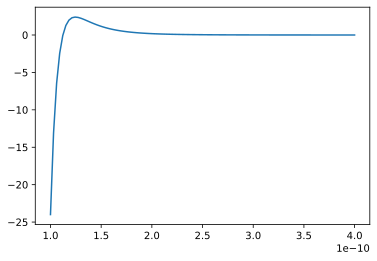

In [15]:
import numpy as np
rs = np.linspace(1e-10, 4*1e-10, 100)
plt.plot(rs, np.vectorize(r_force)(rs))

In [5]:
from numpy import array as vec
from numpy.linalg import norm

zerovec = vec([0.0, 0.0])
def acceleration_induced(by_p: vec, to_p: vec)->vec:
    r = norm(to_p - by_p)
    if norm > 0.0:
        return  r_force(r) / PARTICLE_MASS * \  # сила/масса
                (to_p - by_p) / r               # ед. вектор
    else:
        return zerovec